> ## Adarsha Mondal
> ### MDS202205
> ### adarsha@cmi.ac.in

$Utilization = \dfrac{Octet\_diff \times 8}{1024^2 \times Timespan}$

#### Units
1. $Octet\_diff$ : B
2. $Utilization$ : Mbps
3. $Timespan = datetime_i - datetime_{i-1}$ : s

##### Dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec

from sklearn.linear_model import LinearRegression
import numpy as np
import random

sns.set_style("darkgrid")

##### Import excel data into Pandas Dataframe

In [2]:
df = pd.read_excel('FabricLink_Cleaned_Data_25_July.xlsx')

#### Data Exploration

In [3]:
df.head()

,source_node,source_port,source_type,source_value,operSpeed,operSt,destination_node,destination_port,destination_type,destination_value,octets,lastOctetval,Octet-diff,Utilization,datetime
0,1001,1/1,spine,N9K-C9372PX-E,40G,up,401,1/49,leaf,N9K-C9508,864504425592799,859365645174667,5138780418132,454.98,2022-05-13 19:07:34
1,1001,1/1,spine,N9K-C9372PX-E,40G,up,401,1/49,leaf,N9K-C9508,868309684178755,864504425592799,3805258585956,336.04,2022-05-14 19:07:27
2,1001,1/1,spine,N9K-C9372PX-E,40G,up,401,1/49,leaf,N9K-C9508,873373310562711,868309684178755,5063626383956,446.94,2022-05-15 19:08:04
3,1001,1/1,spine,N9K-C9372PX-E,40G,up,401,1/49,leaf,N9K-C9508,878933845908609,873373310562711,5560535345898,491.01,2022-05-16 19:08:05
4,1001,1/1,spine,N9K-C9372PX-E,40G,up,401,1/49,leaf,N9K-C9508,884694021578201,878933845908609,5760175669592,508.51,2022-05-17 19:08:27


In [4]:
records, fields = df.shape
print(f'The dataset has {records} rows and {fields} columns. And the columns are:')
print(df.dtypes)

The dataset has 19320 rows and 15 columns. And the columns are:
source_node                   int64
source_port                  object
source_type                  object
source_value                 object
operSpeed                    object
operSt                       object
destination_node              int64
destination_port             object
destination_type             object
destination_value            object
octets                        int64
lastOctetval                  int64
Octet-diff                    int64
Utilization                 float64
datetime             datetime64[ns]
dtype: object


In [5]:
df.describe()

,source_node,destination_node,octets,lastOctetval,Octet-diff,Utilization,datetime
count,19320.000000,19320.000000,1.932000e+04,1.932000e+04,1.932000e+04,19320.000000,19320
mean,994.098758,968.245652,1.059739e+15,1.054528e+15,5.211756e+12,460.233398,2022-06-18 10:49:24.550258688
min,101.000000,1.000000,1.957326e+09,4.796470e+08,9.354282e+06,0.000000,2022-05-13 19:07:34
25%,508.000000,508.000000,5.346125e+13,5.330747e+13,1.145443e+11,10.120000,2022-05-30 19:07:23
50%,1001.000000,1001.000000,2.758872e+14,2.734129e+14,9.741893e+11,86.100000,2022-06-18 19:07:32
75%,1002.000000,1002.000000,1.211197e+15,1.206372e+15,5.759890e+12,508.632500,2022-07-06 19:07:38
max,3508.000000,3508.000000,1.119276e+16,1.116793e+16,8.627364e+13,7616.030000,2022-07-24 19:06:49
std,785.577818,764.133486,1.892492e+15,1.885401e+15,9.863051e+12,870.972492,NaN


In [6]:
print(f'Maximum utilization of any link in the given data is\
       {df.Utilization.max()} \
       Mbps and that is {round(df.Utilization.max()/400,2)}% of the bandwidth.')

Maximum utilization of any link in the given data is       7616.03        Mbps and that is 19.04% of the bandwidth.


##### Dropping the rows with CONTROLLER destination_type

In [7]:
df2 = df[['source_node','source_type', 'destination_node', 'destination_type', 
          'Utilization','datetime']]
df2 = df2[df2.destination_type != 'controller']

In [8]:
df2.head()

,source_node,source_type,destination_node,destination_type,Utilization,datetime
0,1001,spine,401,leaf,454.98,2022-05-13 19:07:34
1,1001,spine,401,leaf,336.04,2022-05-14 19:07:27
2,1001,spine,401,leaf,446.94,2022-05-15 19:08:04
3,1001,spine,401,leaf,491.01,2022-05-16 19:08:05
4,1001,spine,401,leaf,508.51,2022-05-17 19:08:27


##### Spine & Leaf nodes in the entire structure

In [9]:
for node_type in ['spine', 'leaf']:
    print(f'{node_type} nodes are: {sorted(set(df2.source_node[df2.source_type==node_type]).union(set(df2.destination_node[df2.destination_type==node_type])))}')

spine nodes are: [1001, 1002]
leaf nodes are: [101, 102, 103, 105, 111, 112, 113, 115, 201, 202, 203, 204, 205, 301, 302, 303, 304, 305, 401, 402, 403, 404, 405, 408, 409, 501, 502, 503, 504, 505, 508, 509, 551, 552, 601, 602, 603, 604, 610, 611, 612, 701, 702, 703, 704, 710, 711, 712, 751, 752, 801, 802, 803, 901, 902, 903, 991, 992, 2501, 2502, 2503, 2504, 2505, 2506, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508]


##### All the bi-rectional and uni-directional nodes

In [10]:
all_links = df2[['source_node','destination_node']].drop_duplicates()
all_links = [(row.source_node, row.destination_node) for index, row in all_links.iterrows()]

In [11]:
print(f'Number of total links: {len(all_links)}')

Number of total links: 284


##### Uni-directional nodes

In [12]:
one_way_links = [(s,d) for (s,d) in all_links if (d,s) not in all_links]

In [13]:
one_way_links

[(3503, 1001), (3503, 1002), (603, 1001), (603, 1002)]

##### Extracting a single bi-directional link

In [14]:
bi_link = (source, dest) = set(all_links).difference(set(one_way_links)).pop()
bi_link_df = df2[((df2.source_node == source) & (df2.destination_node == dest)) | ((df2.source_node == dest) & (df2.destination_node == source))]
bi_link_df['link'] = df2.source_node.astype(str) +', '+ df2.destination_node.astype(str)
bi_link_df

C:\Users\ADARSHA\AppData\Local\Temp\ipykernel_12308\1637804027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bi_link_df['link'] = df2.source_node.astype(str) +', '+ df2.destination_node.astype(str)


,source_node,source_type,destination_node,destination_type,Utilization,datetime,link
4798,1002,spine,203,leaf,10.69,2022-05-13 19:07:34,"1002, 203"
4799,1002,spine,203,leaf,6.88,2022-05-14 19:07:27,"1002, 203"
4800,1002,spine,203,leaf,4.01,2022-05-15 19:08:04,"1002, 203"
4801,1002,spine,203,leaf,6.33,2022-05-16 19:08:05,"1002, 203"
4802,1002,spine,203,leaf,7.04,2022-05-17 19:08:27,"1002, 203"
...,...,...,...,...,...,...,...
10880,203,leaf,1002,spine,6.01,2022-07-20 19:07:32,"203, 1002"
10881,203,leaf,1002,spine,6.45,2022-07-21 19:07:51,"203, 1002"
10882,203,leaf,1002,spine,6.78,2022-07-22 19:07:24,"203, 1002"
10883,203,leaf,1002,spine,8.32,2022-07-23 19:07:43,"203, 1002"


##### Plot both directions `(1002<==>203)` on same graph

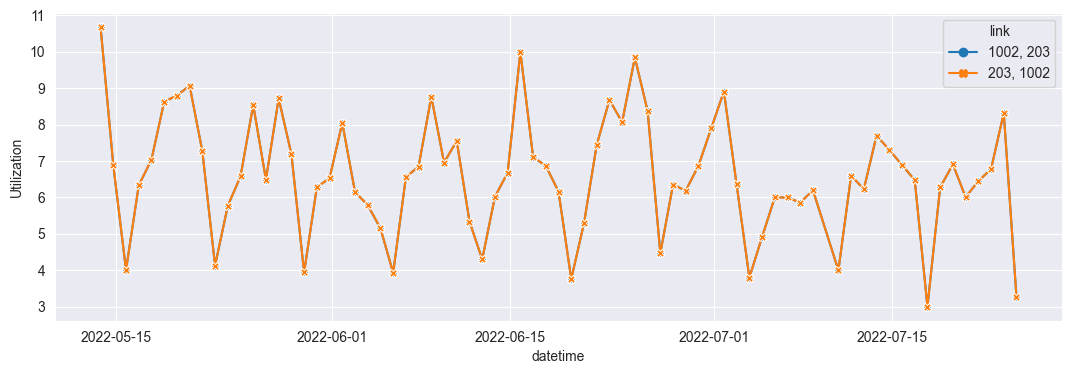

In [15]:
plt.figure(figsize=(13, 4))
sns.lineplot(
    data=bi_link_df,
    x="datetime", y="Utilization", hue="link", style="link",
    markers=True, dashes=False
)
plt.show()

##### **Analysis**
For a bi-directional link the utilization statstics is same on the same timespan. Thus, we can replace both links with a single link.

In [16]:
df3 = df2[df2[['source_node', 'destination_node']].apply(tuple , axis=1).isin(one_way_links) | (df2.source_type == 'spine')]

In [17]:
df3

,source_node,source_type,destination_node,destination_type,Utilization,datetime
0,1001,spine,401,leaf,454.98,2022-05-13 19:07:34
1,1001,spine,401,leaf,336.04,2022-05-14 19:07:27
2,1001,spine,401,leaf,446.94,2022-05-15 19:08:04
3,1001,spine,401,leaf,491.01,2022-05-16 19:08:05
4,1001,spine,401,leaf,508.51,2022-05-17 19:08:27
...,...,...,...,...,...,...
17069,603,leaf,1002,spine,55.45,2022-07-20 19:07:32
17070,603,leaf,1002,spine,64.67,2022-07-21 19:07:51
17071,603,leaf,1002,spine,71.51,2022-07-22 19:07:24
17072,603,leaf,1002,spine,75.98,2022-07-23 19:07:43


In [18]:
filtered_links = df3[['source_node', 'destination_node']].drop_duplicates()
filtered_links = [(row.source_node, row.destination_node) for _,row in filtered_links.iterrows()]

In [19]:
two_way_links = sorted(sorted(set(filtered_links).difference(set(one_way_links)), key = lambda x: x[1]), key = lambda x: x[0])

In [20]:
len(two_way_links)

140

In [21]:
print(f"Links which has bi-directional connection:")
print(two_way_links)
print(f"\nLinks which doesn't have bi-directional connection:")
print(one_way_links)

Links which has bi-directional connection:
[(1001, 101), (1001, 102), (1001, 103), (1001, 105), (1001, 111), (1001, 112), (1001, 113), (1001, 115), (1001, 201), (1001, 202), (1001, 203), (1001, 204), (1001, 205), (1001, 301), (1001, 302), (1001, 303), (1001, 304), (1001, 305), (1001, 401), (1001, 402), (1001, 403), (1001, 404), (1001, 405), (1001, 408), (1001, 409), (1001, 501), (1001, 502), (1001, 503), (1001, 504), (1001, 505), (1001, 508), (1001, 509), (1001, 551), (1001, 552), (1001, 601), (1001, 602), (1001, 604), (1001, 610), (1001, 611), (1001, 612), (1001, 701), (1001, 702), (1001, 703), (1001, 704), (1001, 710), (1001, 711), (1001, 712), (1001, 751), (1001, 752), (1001, 801), (1001, 802), (1001, 803), (1001, 901), (1001, 902), (1001, 903), (1001, 991), (1001, 992), (1001, 2501), (1001, 2502), (1001, 2503), (1001, 2504), (1001, 2505), (1001, 2506), (1001, 3501), (1001, 3502), (1001, 3504), (1001, 3505), (1001, 3506), (1001, 3507), (1001, 3508), (1002, 101), (1002, 102), (1002, 

In [22]:
df3['float_time'] = df3.datetime.apply(lambda x: x.timestamp())

C:\Users\ADARSHA\AppData\Local\Temp\ipykernel_12308\972455434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['float_time'] = df3.datetime.apply(lambda x: x.timestamp())


In [23]:
df3.head()

,source_node,source_type,destination_node,destination_type,Utilization,datetime,float_time
0,1001,spine,401,leaf,454.98,2022-05-13 19:07:34,1.652469e+09
1,1001,spine,401,leaf,336.04,2022-05-14 19:07:27,1.652555e+09
2,1001,spine,401,leaf,446.94,2022-05-15 19:08:04,1.652642e+09
3,1001,spine,401,leaf,491.01,2022-05-16 19:08:05,1.652728e+09
4,1001,spine,401,leaf,508.51,2022-05-17 19:08:27,1.652815e+09


def predict_time(model,threshold=10000):
    t = model.predict(np.array([threshold]).reshape(1,1))
    try:
        timestamp = str(pd.to_datetime(int(t[0]), unit='s'))
        return timestamp.split(' ')[0]
    except Exception as e:
        err_msg = str(e)
        return err_msg.split(' ')[5]
        # print(str(e)[i:])

##### Randomly select 10 links from filtered_links

In [24]:
number_links_to_select = 10
random_links = random.sample(filtered_links, number_links_to_select)

In [25]:
random_links

[(1002, 303),
 (1002, 702),
 (1002, 801),
 (1001, 401),
 (1002, 3507),
 (1001, 3505),
 (1001, 704),
 (1001, 2506),
 (1002, 3508),
 (1001, 703)]

In [26]:
import calendar

# Get the list of day names
days_of_week_list = list(calendar.day_name)
print(days_of_week_list)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


In [27]:
random_links_df = pd.DataFrame(random_links, columns=['source','destination'])
for _ in ['', '%']:
    for column in ['max','min','mean']:
        random_links_df[column+_] = [0]*10

In [28]:
random_links_df

,source,destination,max,min,mean,max%,min%,mean%
0,1002,303,0,0,0,0,0,0
1,1002,702,0,0,0,0,0,0
2,1002,801,0,0,0,0,0,0
3,1001,401,0,0,0,0,0,0
4,1002,3507,0,0,0,0,0,0
5,1001,3505,0,0,0,0,0,0
6,1001,704,0,0,0,0,0,0
7,1001,2506,0,0,0,0,0,0
8,1002,3508,0,0,0,0,0,0
9,1001,703,0,0,0,0,0,0


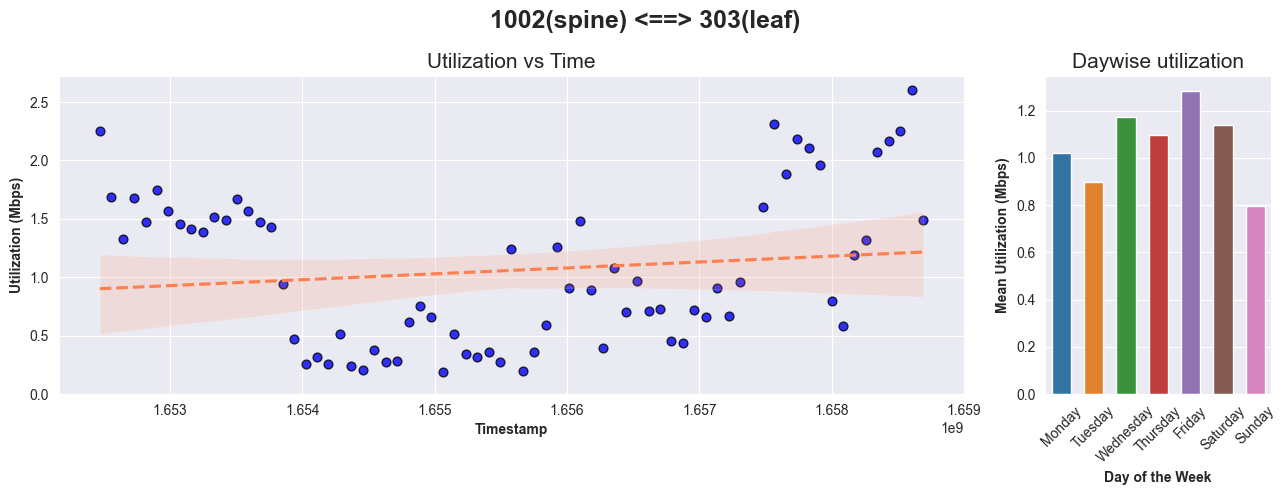

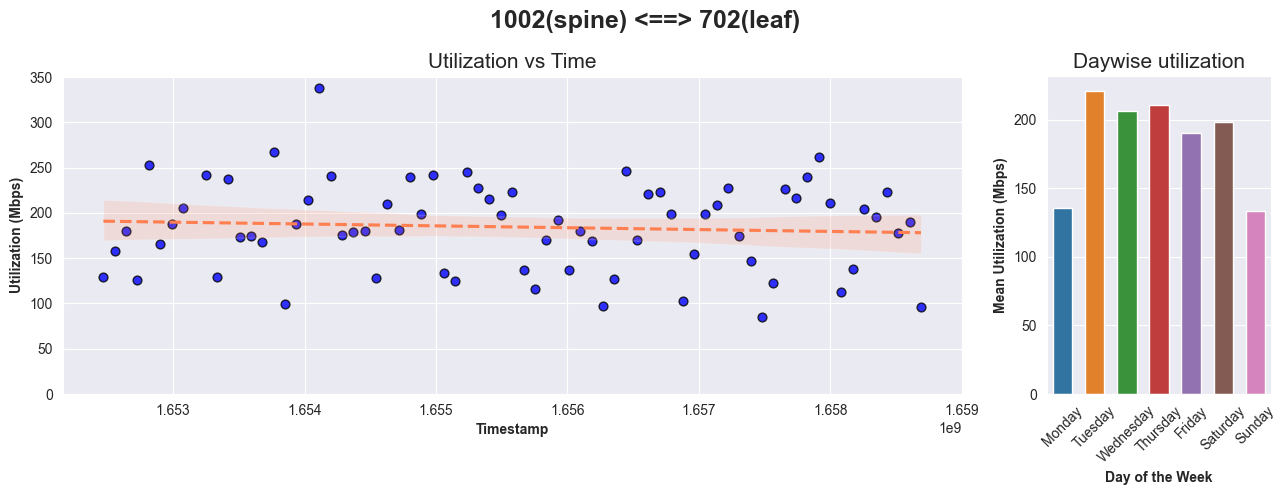

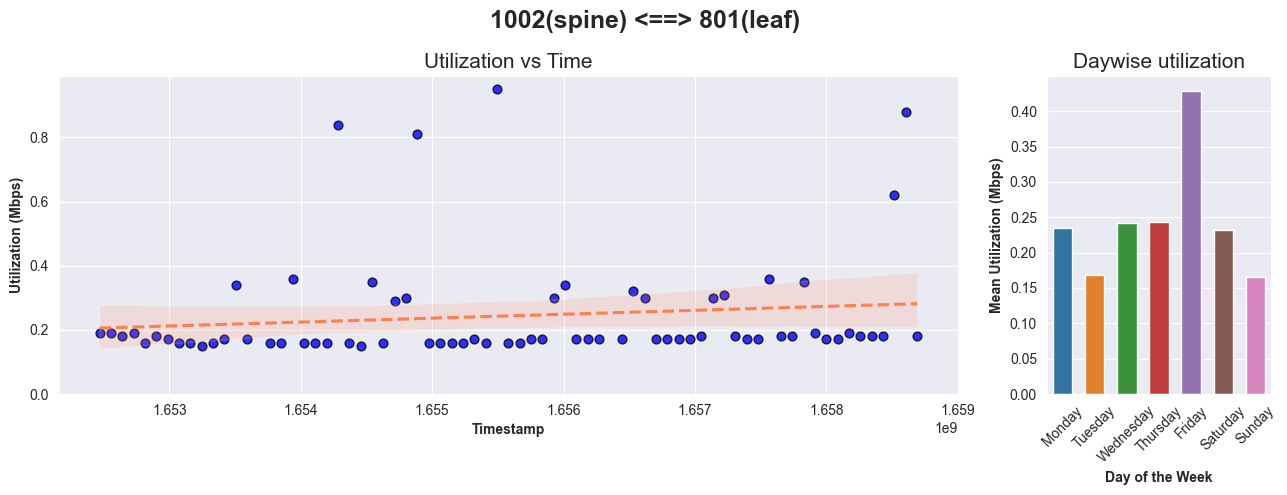

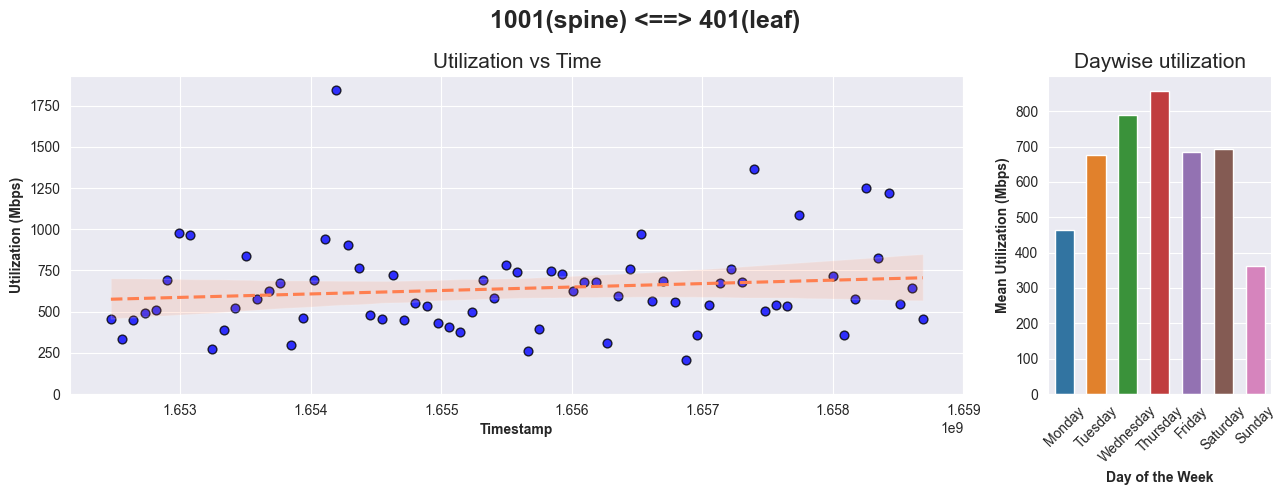

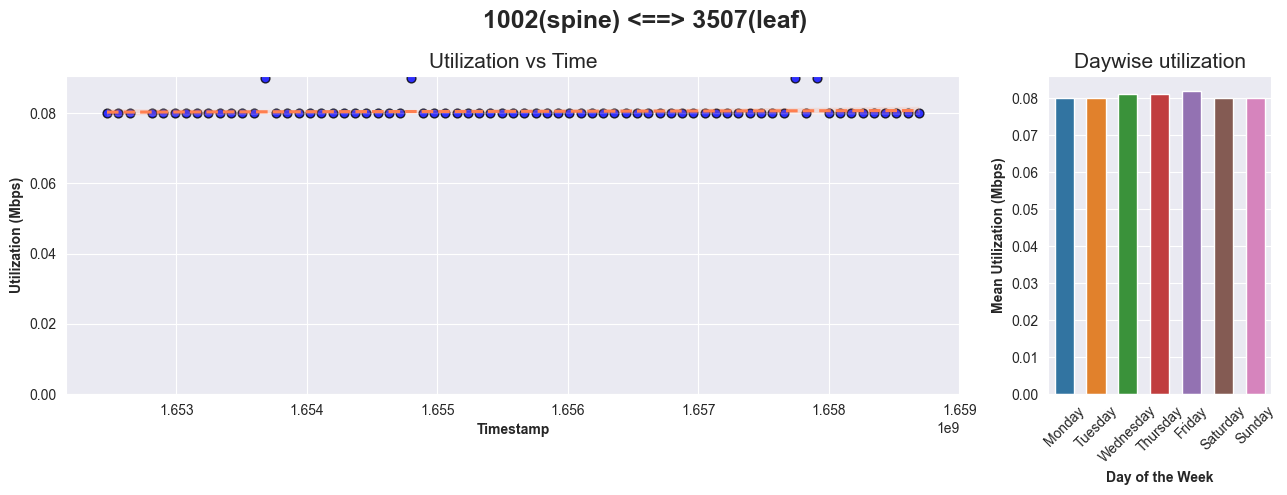

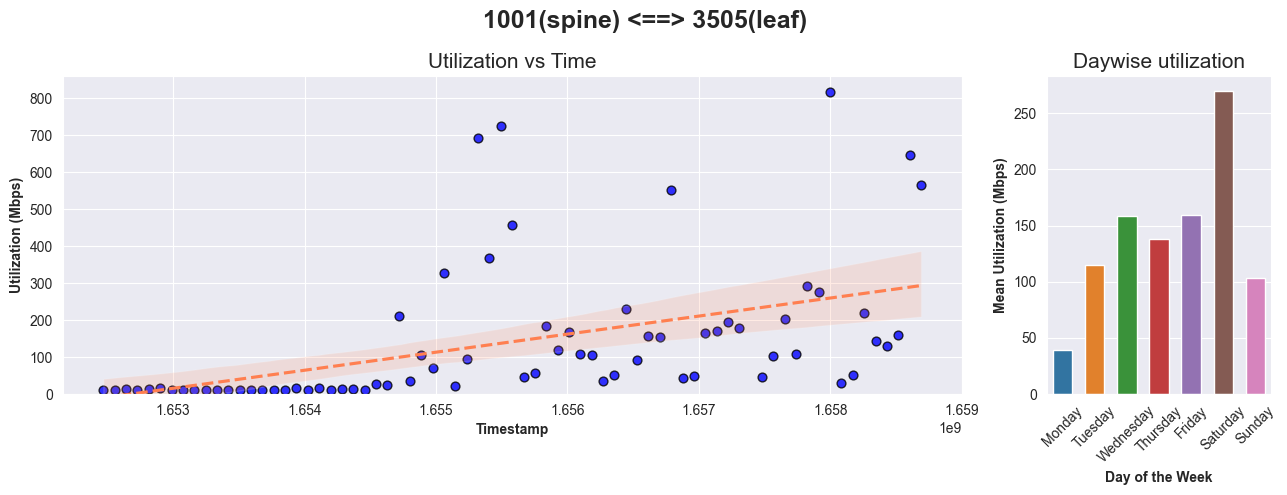

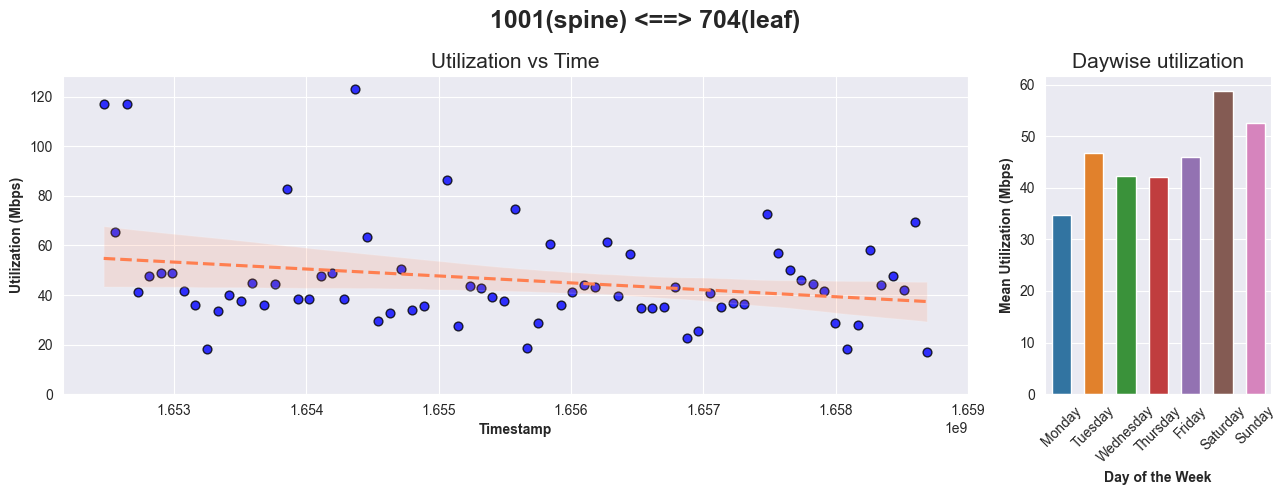

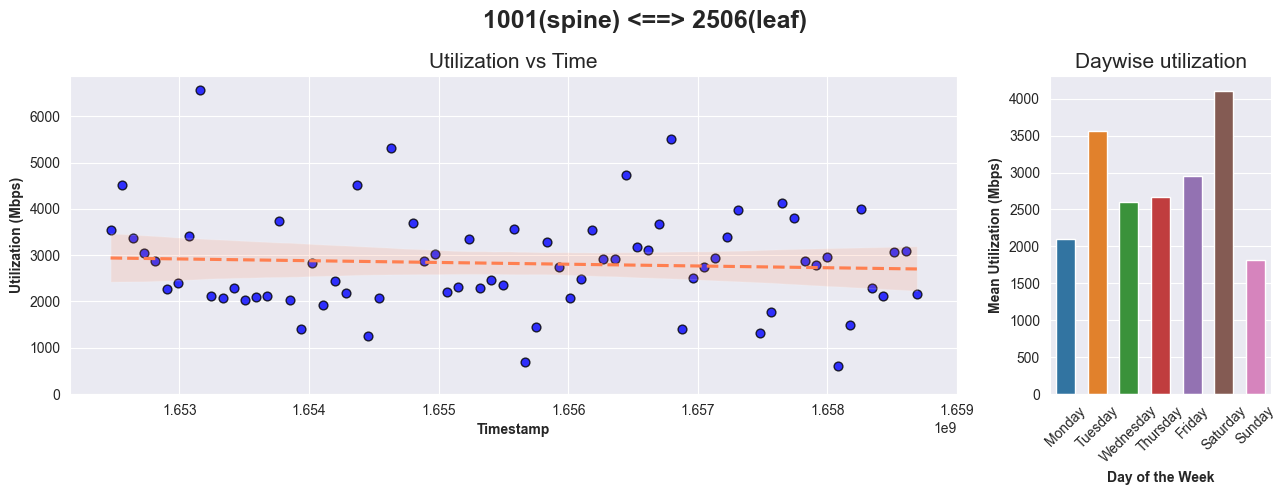

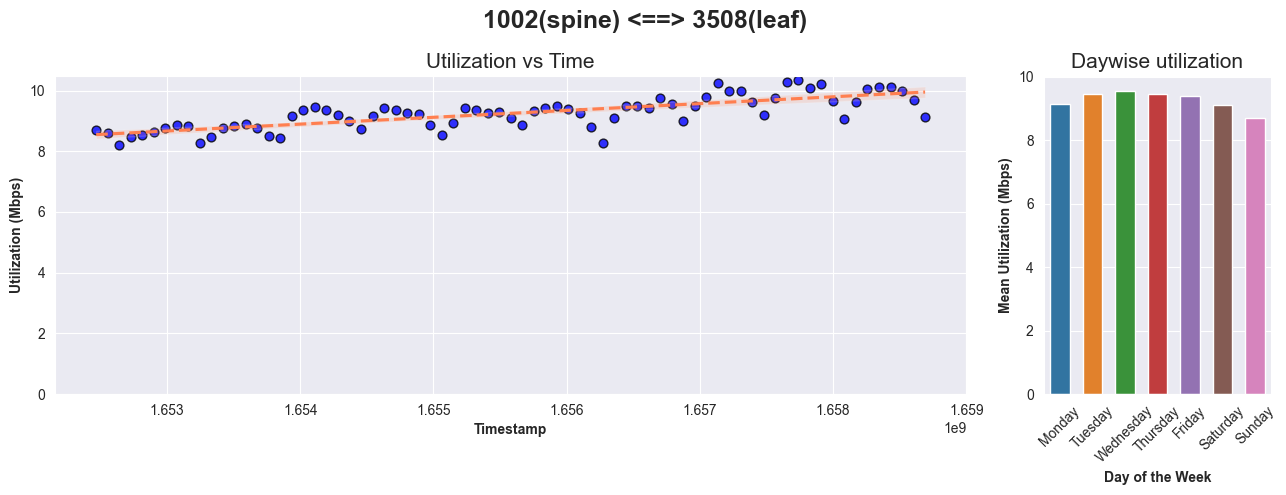

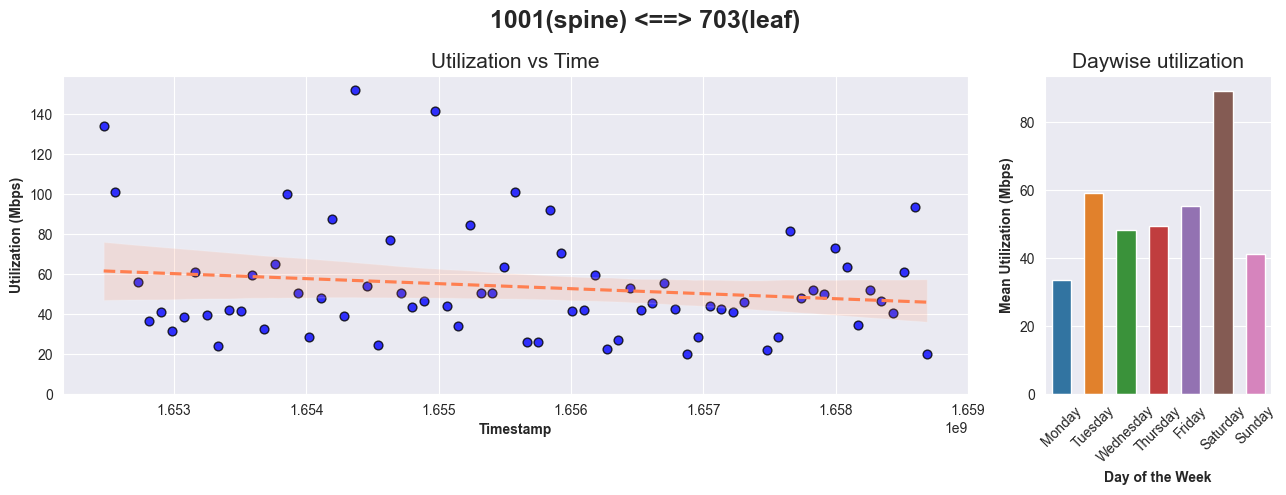

In [29]:
for (s,d) in random_links:
    single_link_df = df3[((df3.source_node==s) & (df3.destination_node==d))].sort_values(by='datetime')
    single_link_df['day'] = single_link_df['datetime'].dt.day_name()

    random_links_df.loc[(random_links_df.source==s) & (random_links_df.destination==d), ['max','min','mean']] = tuple(single_link_df.Utilization.describe().loc[['max','min','mean']])
    for stat in ['max','min','mean']:
        random_links_df[stat+'%'] = random_links_df[stat] / (4*10**2)

    day_grouped_mean_utilize = single_link_df[['Utilization','day']].groupby('day').mean()


    day_grouped_mean_utilize = day_grouped_mean_utilize.reset_index()
    day_grouped_mean_utilize['day'] = pd.Categorical(day_grouped_mean_utilize['day'], categories=days_of_week_list, ordered=True)

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(13, 5), gridspec_kw={'width_ratios': [8, 2]})
    # gs = gridspec.GridSpec(1, 2, width_ratios=[8,2])
    
    plt.suptitle(f'{s}({single_link_df.source_type.unique()[0]}) <==> {d}({single_link_df.destination_type.unique()[0]})', fontsize=18, fontweight="bold")

    # Get the regression parameters (slope and intercept)
    # y = np.array(single_link_df.Utilization.values)
    # x = np.array(single_link_df.float_time.values).reshape(-1,1)
    
    # model = LinearRegression()
    # model.fit(x,y)
    # slope = model.coef_[0]
    # intercept = model.intercept_

    # if slope > 0:
    #     subtitle = f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nReaches 10Gbps on {predict_time(model)}'
    #     plt.text(0,0, subtitle, horizontalalignment='left',verticalalignment='bottom', fontsize=9, transform=plt.gca().transAxes)

    # Regreesion Plot
    # axes[0] = plt.subplot(gs[0])
    sns.regplot(data=single_link_df, x='float_time', y='Utilization',fit_reg = True, ax=axes[0],
    line_kws = {'label': 'Regression line', 'linestyle': '--', 'color': 'coral'}, 
    scatter_kws ={'s':40, 'color': 'blue', 'edgecolors': 'black'})

    axes[0].set_ylim(0)
    # axes[0].set_ylim((1.65*10**9,1.66*10**9))
    # axes[0].set_xticklabels(single_link_df.datetime.dt.date)
    axes[0].set_ylabel('Utilization (Mbps)', fontweight="bold")
    axes[0].set_xlabel('Timestamp', fontweight="bold")  
    axes[0].set_title(f'Utilization vs Time', fontsize=15)

    
    # Barplot
    # axes[1] = plt.subplot(gs[1])
    sns.barplot(x='day', y='Utilization', data=day_grouped_mean_utilize, ax=axes[1], width = 0.6)
    axes[1].set_xlabel('Day of the Week', fontweight="bold")
    axes[1].set_ylabel('Mean Utilization (Mbps)', fontweight="bold")
    axes[1].set_title(f'Daywise utilization', fontsize=15)
    plt.xticks(rotation=45)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

#### Bandwidth Utilizations

In [30]:
random_links_df['link'] = [str(i) for i in random_links]

In [31]:
random_links_df

,source,destination,max,min,mean,max%,min%,mean%,link
0,1002,303,2.60,0.19,1.057500,0.006500,0.000475,0.002644,"(1002, 303)"
1,1002,702,338.17,85.53,184.440278,0.845425,0.213825,0.461101,"(1002, 702)"
2,1002,801,0.95,0.15,0.243803,0.002375,0.000375,0.000610,"(1002, 801)"
3,1001,401,1845.67,205.00,639.691857,4.614175,0.512500,1.599230,"(1001, 401)"
4,1002,3507,0.09,0.08,0.080556,0.000225,0.000200,0.000201,"(1002, 3507)"
5,1001,3505,815.33,10.13,140.154444,2.038325,0.025325,0.350386,"(1001, 3505)"
6,1001,704,123.03,16.93,46.122676,0.307575,0.042325,0.115307,"(1001, 704)"
7,1001,2506,6565.88,600.85,2821.226056,16.414700,1.502125,7.053065,"(1001, 2506)"
8,1002,3508,10.36,8.20,9.248767,0.025900,0.020500,0.023122,"(1002, 3508)"
9,1001,703,152.37,19.85,53.743944,0.380925,0.049625,0.134360,"(1001, 703)"


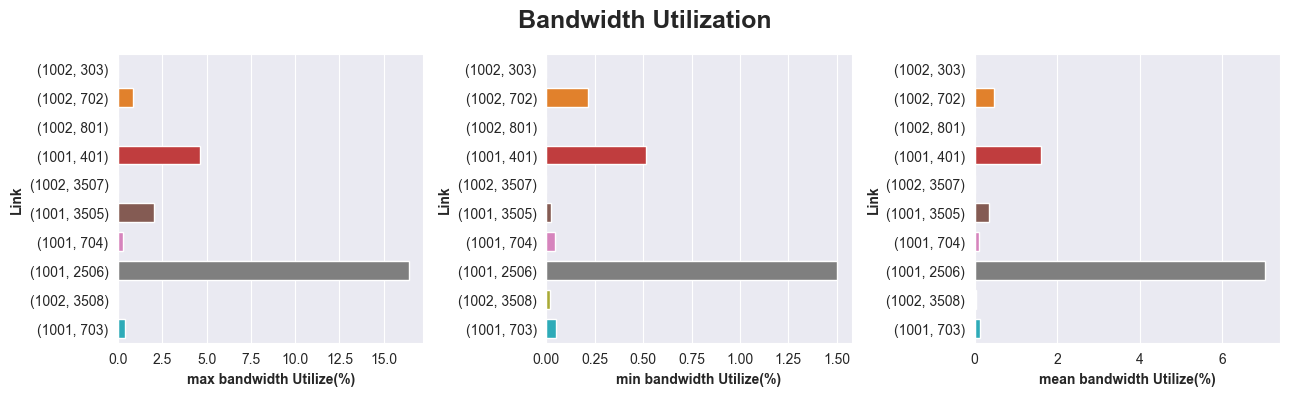

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

plt.suptitle('Bandwidth Utilization', fontsize=18, fontweight="bold")

for i, stat in tuple(enumerate(['max','min','mean'])):
    sns.barplot(data=random_links_df, x=stat+'%', y='link', orient='h', ax=axes[i],width = 0.65)
    axes[i].set_ylabel('Link', fontweight="bold")
    axes[i].set_xlabel(f'{stat} bandwidth Utilize(%)', fontweight="bold")  


# Adjust layout
plt.tight_layout()
plt.show()

#### `1. Are there any links which show similar patterns?`

The links are chosen at random from overall links' set. And from the chosen ones, any particular pattern or trend is not followed by all of the links. Be it their distribution over time or even its statitical markers are seemed to be random in nature.

#### `2. Are there weekday or weekend patterns?`
Generally each of the timestamp taken around 19:00 hours. Therefore, we can say that, majority of the transfers of that day has been already done while the timestamp is taken. In other words it's safe to say that, the day in which the timestamp starts actually constitutes next days transaction amount.

By the above explanation, _Friday_ & _Saturday_ (in graphs) actually has the transactions of _Saturday_ & _Sunday_ (weekends) respectively. This discloses some key inferences from the **Daywise utilization** graphs above. 

From the chosen links, quite a few has higher transactions in Saturday(see bar graphs above) compared to other days. Apart from that no other significant pattern has been found.

#### `3. What are the inferences that you can draw?`

All the links have siginificantly fluctuating readings and do not seem to follow any commonly known model. As the Utilization reading is taken within a span of 2 months in roughly a day's interval, it is safe to say that data follows some `time-series modelling`. And it follows a `cyclic pattern` that is subject to further analysis.

#### `4. How are the bandwidth utlizations?`

The statistics of bandwidth utilization is shown in the above graph. In that graph, key statistics has been given as a percentage of Bandwidth (40Gbps) for all 10 links.